In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm

%matplotlib inline

In [2]:
data = pd.read_csv('clean_full.csv')

In [3]:
data.head()

paper_id  \
0  0000028b5cc154f68b8a269f6578f21e31f62977   
1  0001418189999fea7f7cbe3e82703d71c85a6fe5   
2  00033d5a12240a8684cfe943954132b43434cf48   
3  0003793cf9e709bc2b9d0c8111186f78fb73fc04   
4  000379d7a7f37a2ccb978862b9f2016bd03259ea   

                                               title  \
0       "Multi-faceted" COVID-19: Russian experience   
1  Absence of surface expression of feline infect...   
2  Detection of Severe Acute Respiratory Syndrome...   
3     Title: Rethinking high-risk groups in COVID-19   
4  ScienceDirect ScienceDirect Effect of Nanomate...   

                                             authors  \
0                                               None   
1  ['E Cornelissen', 'H Dewerchin', 'E Hamme', 'H...   
2  ['Petra Wandernoth', 'Katharina Kriegsmann', '...   
3         ['Anastasia Vishnevetsky', 'Michael Levy']   
4               ['Harish Devaraj', 'Rajiv Malhotra']   

                                            abstract  \
0                                               None   
1  ['Feline infectious peritonitis virus (FIPV) p...   
2  ['Background: Amplification of viral ribonucle...   
3                                               None   
4  ['approach. The NM shape in the conformal circ...   

                                           body_text  
0   According to current live statistics at the t...  
1   Feline infectious peritonitis FIP is a fatal ...  
2   Severe acute respiratory syndrome coronavirus...  
3   How do we protect our high risk patient popul...  
4   Integration of functional electronic devices ...

In [5]:
data.shape

(128915, 5)

In [6]:
df = data.drop(["title", "authors", "abstract"], axis = 1)

In [7]:
df.head()

paper_id  \
0  0000028b5cc154f68b8a269f6578f21e31f62977   
1  0001418189999fea7f7cbe3e82703d71c85a6fe5   
2  00033d5a12240a8684cfe943954132b43434cf48   
3  0003793cf9e709bc2b9d0c8111186f78fb73fc04   
4  000379d7a7f37a2ccb978862b9f2016bd03259ea   

                                           body_text  
0   According to current live statistics at the t...  
1   Feline infectious peritonitis FIP is a fatal ...  
2   Severe acute respiratory syndrome coronavirus...  
3   How do we protect our high risk patient popul...  
4   Integration of functional electronic devices ...

In [8]:
df1 = df.sample(frac=0.20, random_state=1)

In [10]:
df1.shape

(25783, 2)

### NLP

In [13]:
import spacy
import en_core_web_sm

In [14]:
nlp = en_core_web_sm.load()

In [15]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chopr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
import re

In [21]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's birthday.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'birthday']


In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chopr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [375]:
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))
stop_words_nltk.update([
    'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon',
    'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri',
    'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon',
    'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi',
    'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon',
    'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas',
    'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim',
    'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor',
    'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea',
    'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv', "'d", "'s", 'anywh',
    'could', 'doe', 'el', 'elsewh', 'everywh', 'ind', 'might', 'must', "n't",
    'need', 'otherwi', 'plea', 'sha', 'somewh', 'wo', 'would','et','al','However','also',
    'pt','n','P','e','g','R','using','B','use','used','shown','h','C', 'Therefore','<','>'
])

In [25]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=None,
                                 min_df=0.2, stop_words=stop_words_nltk,
                                 use_idf=True,smooth_idf=1,sublinear_tf=1, tokenizer= tokenize_and_stem,
                                 ngram_range=(1,3),lowercase=True)

In [27]:
#IMPORTANT: DO NOT RUN AGAIN
t_matrix = tfidf_vectorizer.fit_transform(tqdm([x for x in df1["body_text"]]))

100%|████████████████████████████████████████████████████████████████████████████| 25783/25783 [40:44<00:00, 10.55it/s]


### Dimensionality reduction

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver = 'full',random_state=1)
X_pca= pca.fit_transform(t_matrix.toarray())
X_pca.shape

(25783, 644)

In [37]:
variance = pca.explained_variance_ratio_
cumulative_var = np.cumsum(variance*100)
cumulative_var[-1]

95.00567898193191

number of principle components that explain 95% variance are 644

In [38]:
from sklearn.manifold import TSNE

In [47]:
tsne = TSNE(verbose=1, perplexity=100, random_state=42)

In [54]:
#IMPORTANT: DO NOT RUN AGAIN
tsne_x = tsne.fit_transform(t_matrix.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 25783 samples in 8.883s...
[t-SNE] Computed neighbors for 25783 samples in 1020.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25783
[t-SNE] Computed conditional probabilities for sample 2000 / 25783
[t-SNE] Computed conditional probabilities for sample 3000 / 25783
[t-SNE] Computed conditional probabilities for sample 4000 / 25783
[t-SNE] Computed conditional probabilities for sample 5000 / 25783
[t-SNE] Computed conditional probabilities for sample 6000 / 25783
[t-SNE] Computed conditional probabilities for sample 7000 / 25783
[t-SNE] Computed conditional probabilities for sample 8000 / 25783
[t-SNE] Computed conditional probabilities for sample 9000 / 25783
[t-SNE] Computed conditional probabilities for sample 10000 / 25783
[t-SNE] Computed conditional probabilities for sample 11000 / 25783
[t-SNE] Computed conditional probabilities for sample 12000 / 25783
[t-SNE] Computed conditional probabilities for

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



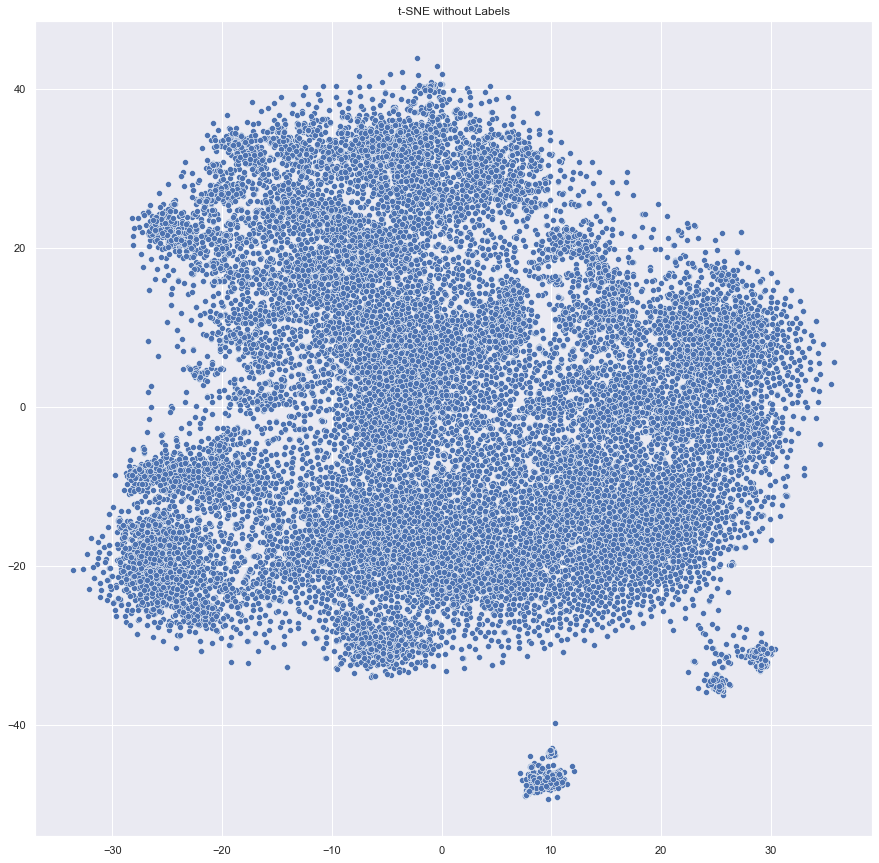

In [537]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(tsne_x[:,0], tsne_x[:,1])#, hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE without Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

### Clustering

In [56]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN

#### K Means

K Means + PCA

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [22:43<00:00, 27.82s/it]


Time:  1363.167438299999


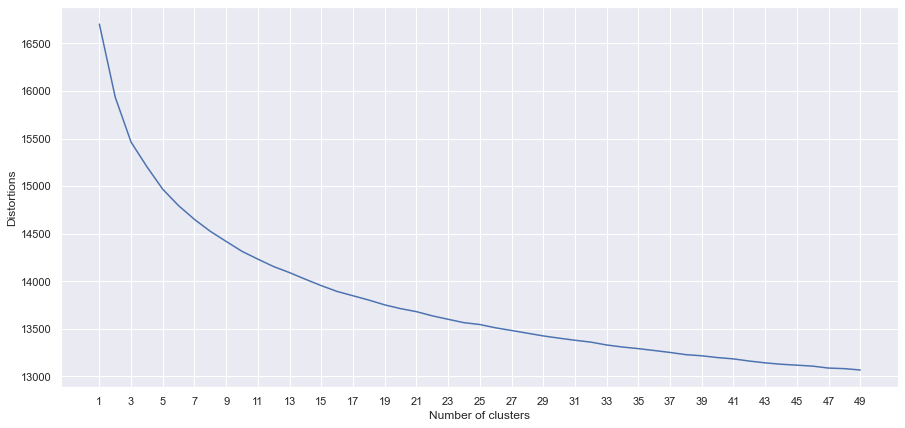

In [104]:
import timeit

start = timeit.default_timer()
# Run Kmeans for a batch of cluster to find optimal k
distortions = {}
for k in tqdm(np.arange(1, 50, 1)):
    km = KMeans(n_clusters=k, max_iter=1000).fit(X_pca)
    distortions[k] = km.inertia_
    


Time: 1363.167438299999


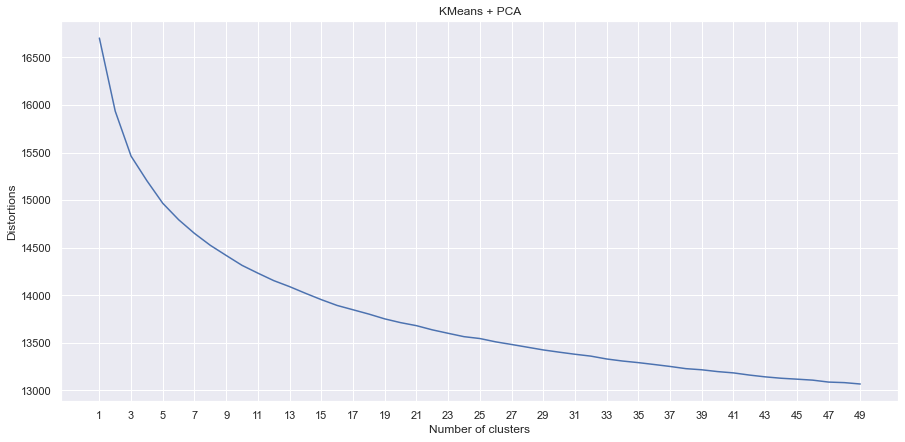

In [106]:
print('Time: 1363.167438299999')

plt.figure(figsize = (15, 7))
plt.plot(list(distortions.keys()), list(distortions.values()))
plt.xlabel("Number of clusters")
plt.xticks(np.arange(1, 50, 2))
plt.ylabel("Distortions")
plt.title("KMeans + PCA")
plt.show()

for our PCA data, we take k=15 and fit k means again and plot our clusters

In [109]:
kmp = KMeans(n_clusters=15, max_iter=1000).fit_predict(X_pca)

In [110]:
kmps = pd.Series(kmp)
kmps.value_counts()

2     2823
5     2591
3     2116
1     2100
14    1999
11    1847
0     1821
4     1730
13    1711
6     1696
9     1603
7     1551
10    1400
12     412
8      383
dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


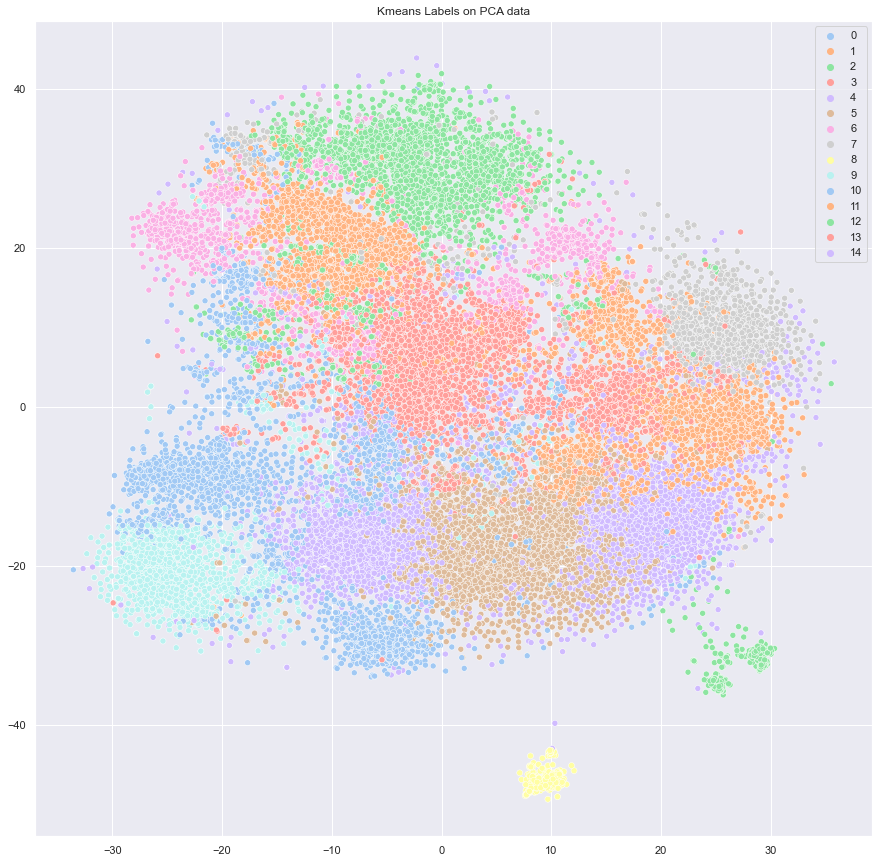

In [111]:
sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=kmp, legend='full', palette='pastel')
plt.title('Kmeans Labels on PCA data')
#plt.savefig("improved_cluster_tsne.png")
plt.show()

KMeans + TSNE

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:01<00:00,  2.46s/it]


Time:  61.39808830000038


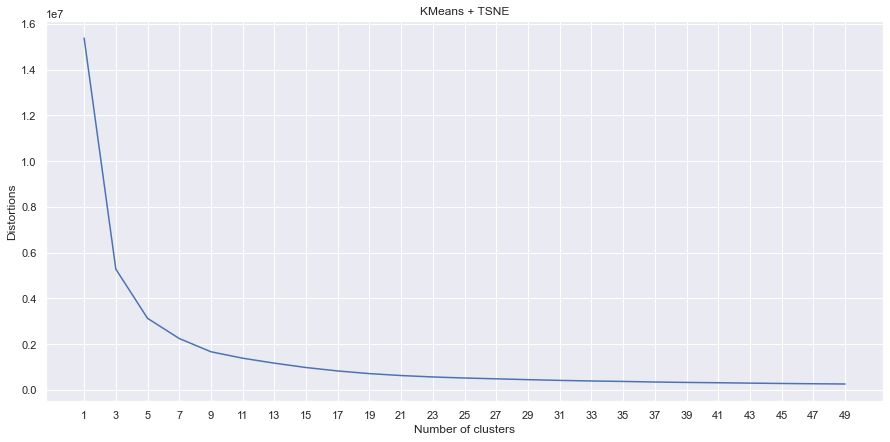

In [108]:
import timeit

startt = timeit.default_timer()
# Run Kmeans for a batch of cluster to find optimal k
distortionst = {}
for k in tqdm(np.arange(1, 50, 2)):
    kmt = KMeans(n_clusters=k, max_iter=1000).fit(tsne_x)
    distortionst[k] = kmt.inertia_
    
stopt = timeit.default_timer()
print('Time: ', stopt - startt)

plt.figure(figsize = (15, 7))
plt.plot(list(distortionst.keys()), list(distortionst.values()))
plt.xlabel("Number of clusters")
plt.xticks(np.arange(1, 50, 2))
plt.ylabel("Distortions")
plt.title("KMeans + TSNE")
plt.show()

fitting our final k means model with k = 9 on our TSNE data

In [97]:
km9 = KMeans(n_clusters=9).fit_predict(tsne_x)

In [102]:
km9s = pd.Series(km9)
km9s.value_counts()

1    3818
6    3453
4    3380
3    3279
2    3128
8    2954
5    2721
0    2205
7     845
dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


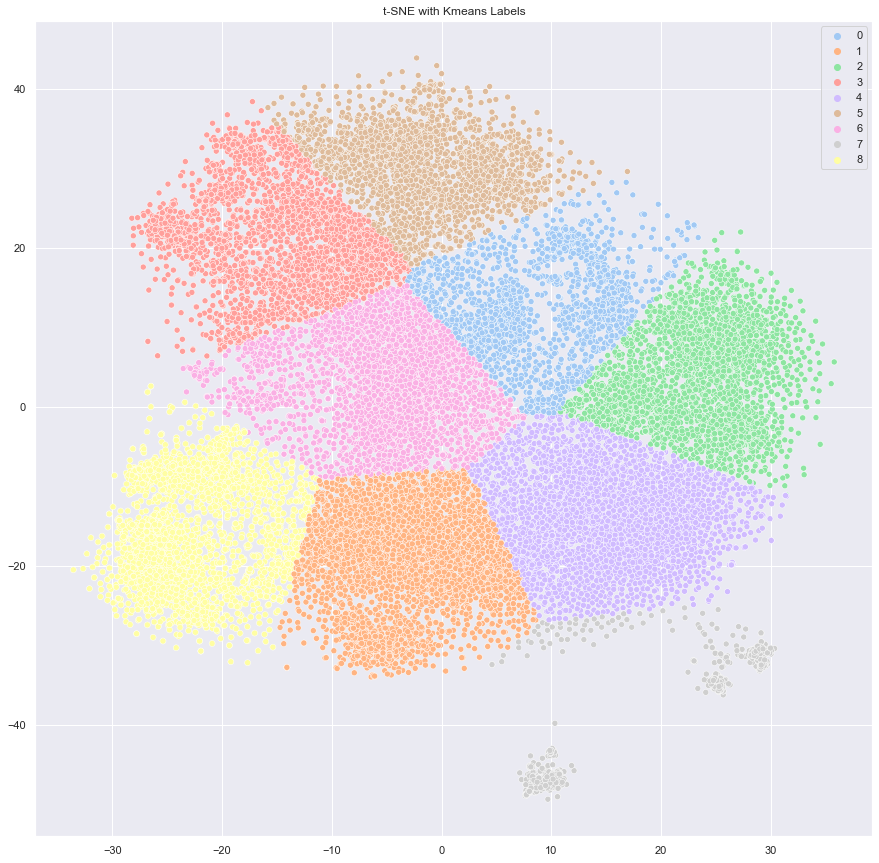

In [103]:
sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=km9, legend='full', palette='pastel')
plt.title('t-SNE with Kmeans Labels')
#plt.savefig("improved_cluster_tsne.png")
plt.show()

#### DBSCAN 

TSNE + DBSCAN

In [317]:
dbscan = DBSCAN(eps = 4, min_samples=500) #4, 400

In [318]:
start_db = timeit.default_timer()
dbk = dbscan.fit_predict(tsne_x)
stop_db = timeit.default_timer()
print('time: ', stop_db-start_db)

time:  1.636229399999138


In [319]:
dbks = pd.Series(dbk)
dbks.value_counts()

-1    6717
 3    5940
 1    3285
 2    2164
 0    1882
 4    1843
 5    1448
 6    1231
 8     651
 7     622
dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


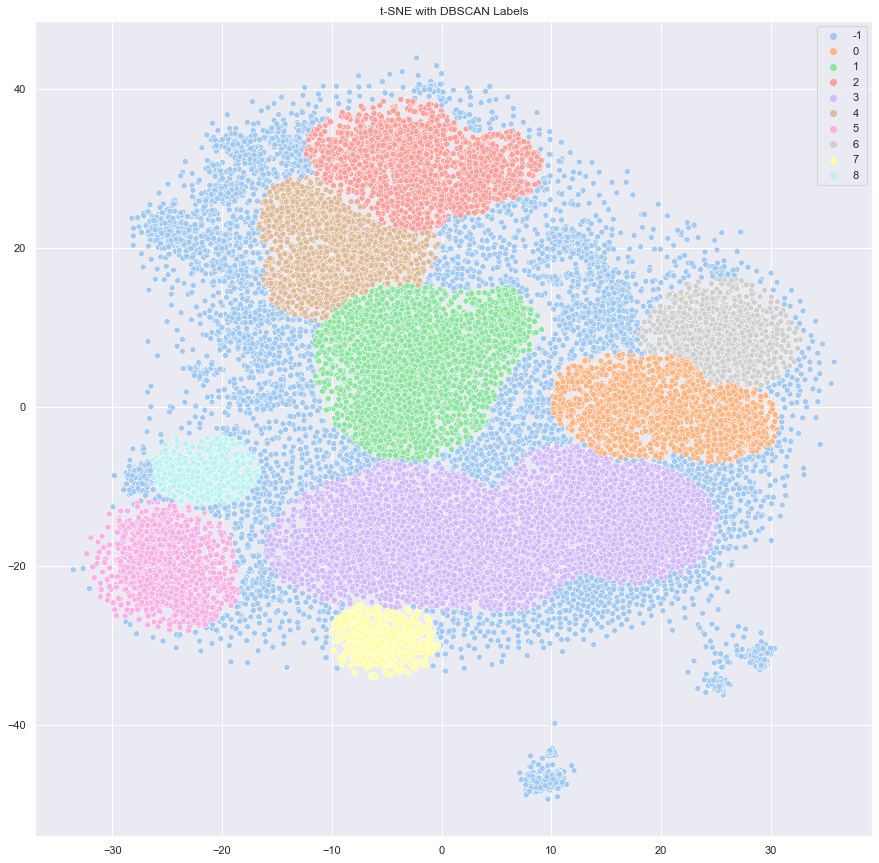

In [320]:
sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=dbk, palette='pastel')
plt.title('t-SNE with DBSCAN Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

PCA + DBSCAN

In [384]:
dbscanp = DBSCAN(eps = 2, min_samples=400) #4, 400

In [385]:
start_db = timeit.default_timer()
dbkp = dbscanp.fit_predict(X_pca)
stop_db = timeit.default_timer()
print('time: ', stop_db-start_db)

time:  1773.071515500007


In [386]:
dbksp = pd.Series(dbkp)
dbksp.value_counts()

0    25783
dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



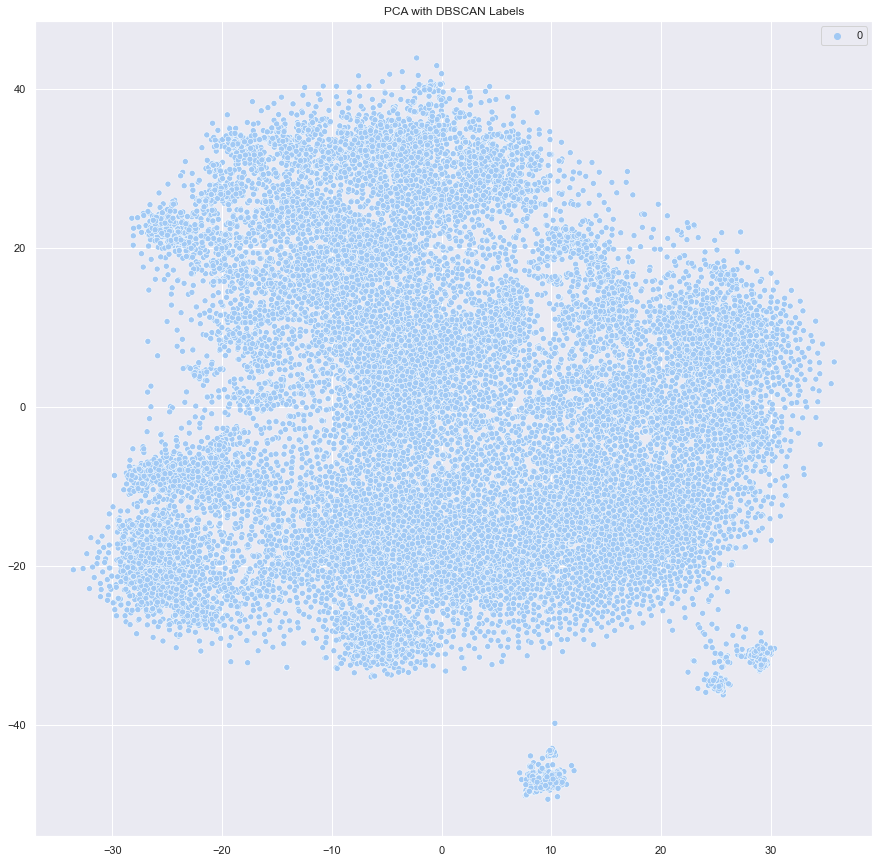

In [387]:
sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=dbkp, legend='full', palette='pastel')
plt.title('PCA with DBSCAN Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

# word cloud

In [332]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import chart_studio.plotly as py
import plotly
import nltk
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [340]:
df2 = df1
len(df2)

25783

In [341]:
df2=df2[df2['body_text'].apply(lambda x: any(c.isalpha() for c in x)== True)]
len(df2)

25781

In [378]:
#text = " ".join(comment for comment in df1.body_text)
text = df2['body_text'].iloc[1:500]
text =" ".join(comment for comment in text)
#text


In [379]:
wc = wordcloud.WordCloud(stopwords= stop_words_nltk).generate(text)

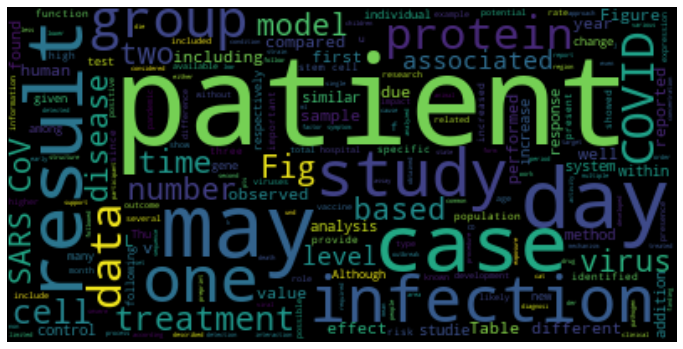

In [381]:
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [538]:
#wc.words_

distribution of length of body text

In [461]:
length_body = df1['body_text'].apply(lambda x: len(x))
length_body

111289    18135
14234     14709
54421      3678
55193     24362
41956     22658
          ...  
105933    16623
30248     16859
85034      3611
89967      5056
78468      5171
Name: body_text, Length: 25783, dtype: int64

Text(0.5, 1.0, 'distribution of length of articles')

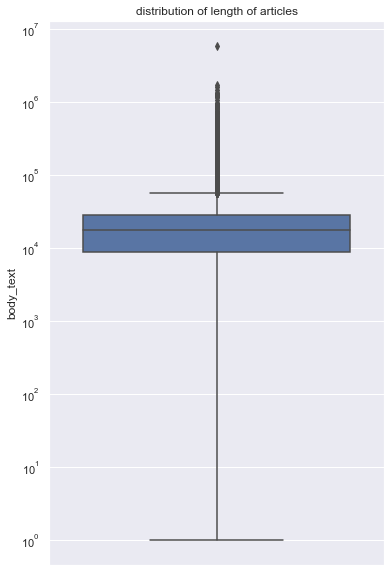

In [532]:
plt.figure(figsize = (6,10))
sns.boxplot(y=length_body)
plt.yscale('log')
plt.title("distribution of length of articles")

##### label examination for tsne

In [391]:
pd.Series(km9).value_counts()

1    3818
6    3453
4    3380
3    3279
2    3128
8    2954
5    2721
0    2205
7     845
dtype: int64

In [542]:
km95 = (np.where(km9 == 9)[0])
type(km95)

numpy.ndarray

In [403]:
len(data)

128915

In [408]:
#list(df1.index)

In [409]:
data = data.iloc[list(df1.index),]
data.head()

paper_id  \
111289  dd3e9d2b7758e7c89ed849c94c789b18368619f5   
14234   1c5f2a7a584371461fa19a49e49c99ecd0ef7743   
54421   6bbfa60c9721e69639cb614ab8ef5d8ef01b1b99   
55193   6d5521f2e67cae682e9824118ad7ad98da10299b   
41956   530fba50d0d6378e080e760093969b0b3b9c479d   

                                                    title  \
111289  Comparison of media and standards for SARS-CoV...   
14234   Genetic Variability and Phylogeny of Current C...   
54421   Title Page Letter to the Editor Unintended Con...   
55193   Using NLP to Analyze Political Polarization Du...   
41956   Influence of the Pressure Difference and Door ...   

                                                  authors  \
111289  ['Katherine Ragan', 'Sanchita Bhadra', 'Joon C...   
14234   ['Ruiqin Sun', 'Zhangming Leng', 'Shao-Lun Zha...   
54421            ['Angela Chow', 'Aung Hein', 'Win Kyaw']   
55193                                   ['Parth Shisode']   
41956   ['Jacek Hendiger', 'Marta Chludzińska', 'Piotr...   

                                                 abstract  \
111289  ['Since the emergence of the severe acute resp...   
14234   ['Since late 2010, the outbreak of porcine epi...   
54421                                                None   
55193   ['Democrats and Republicans have seemed to gro...   
41956   ['This paper presents the results of investiga...   

                                                body_text  
111289   The causative agent of COVID is the highly co...  
14234    PED caused by PEDV is a highly contagious ent...  
54421    Lam et al reported that tropical countries sh...  
55193    Currently the COVID pandemic is posing a dang...  
41956    An effective and well designed ventilation sy...

In [410]:
data_with_kmeans_labels = data

In [411]:
data_with_kmeans_labels['labels'] = km9

In [412]:
data_with_kmeans_labels.head()

paper_id  \
111289  dd3e9d2b7758e7c89ed849c94c789b18368619f5   
14234   1c5f2a7a584371461fa19a49e49c99ecd0ef7743   
54421   6bbfa60c9721e69639cb614ab8ef5d8ef01b1b99   
55193   6d5521f2e67cae682e9824118ad7ad98da10299b   
41956   530fba50d0d6378e080e760093969b0b3b9c479d   

                                                    title  \
111289  Comparison of media and standards for SARS-CoV...   
14234   Genetic Variability and Phylogeny of Current C...   
54421   Title Page Letter to the Editor Unintended Con...   
55193   Using NLP to Analyze Political Polarization Du...   
41956   Influence of the Pressure Difference and Door ...   

                                                  authors  \
111289  ['Katherine Ragan', 'Sanchita Bhadra', 'Joon C...   
14234   ['Ruiqin Sun', 'Zhangming Leng', 'Shao-Lun Zha...   
54421            ['Angela Chow', 'Aung Hein', 'Win Kyaw']   
55193                                   ['Parth Shisode']   
41956   ['Jacek Hendiger', 'Marta Chludzińska', 'Piotr...   

                                                 abstract  \
111289  ['Since the emergence of the severe acute resp...   
14234   ['Since late 2010, the outbreak of porcine epi...   
54421                                                None   
55193   ['Democrats and Republicans have seemed to gro...   
41956   ['This paper presents the results of investiga...   

                                                body_text  labels  
111289   The causative agent of COVID is the highly co...       0  
14234    PED caused by PEDV is a highly contagious ent...       3  
54421    Lam et al reported that tropical countries sh...       4  
55193    Currently the COVID pandemic is posing a dang...       8  
41956    An effective and well designed ventilation sy...       6

#### using a naive bayes classifier

all train test splits

In [413]:
from sklearn.model_selection import train_test_split

In [414]:
y = data_with_kmeans_labels['labels'] # TSNE + KMeans

In [435]:
type(y)

pandas.core.series.Series

In [416]:
x = t_matrix

In [417]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [505]:
y1 = kmp #PCA + KMeans
y1 = pd.Series(y1)
type(y1)
y1.value_counts()

2     2823
5     2591
3     2116
1     2100
14    1999
11    1847
0     1821
4     1730
13    1711
6     1696
9     1603
7     1551
10    1400
12     412
8      383
dtype: int64

In [506]:
x1 = t_matrix

In [507]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=1,stratify=y1)

In [452]:
y2 = dbks #DBSCAN + TSNE
y2

0       -1
1       -1
2        3
3        3
4       -1
        ..
25778    2
25779   -1
25780    0
25781    6
25782   -1
Length: 25783, dtype: int64

In [453]:
x2 = t_matrix

In [454]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=42)

#### naive bayes classifier

In [508]:
from sklearn.naive_bayes import MultinomialNB

In [509]:
from sklearn import metrics

In [510]:
# Create the list of alphas: alphas

alphas = np.arange(0, 1, 0.1)

In [513]:
# Define train_and_predict()
# for t sne and kmeans
def train_and_predict(alpha):

    # Instantiate the classifier: nb_classifier

    nb_classifier = MultinomialNB( alpha=alpha)

    # Fit to the training data

    nb_classifier.fit(X_train, y_train)

    # Predict the labels: pred

    pred = nb_classifier.predict(X_test)

    # Compute accuracy: score

    score = metrics.accuracy_score(y_test, pred)

    return score

In [514]:
for alpha in alphas:

    print('Alpha: ', alpha)

    print('Score: ', train_and_predict(alpha))

    print()

Alpha:  0.0
Score:  0.7799612152553329

Alpha:  0.1
Score:  0.7797026502908856

Alpha:  0.2


C:\Users\chopr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Score:  0.7799612152553329

Alpha:  0.30000000000000004
Score:  0.7800904977375566

Alpha:  0.4
Score:  0.7800904977375566

Alpha:  0.5
Score:  0.7800904977375566

Alpha:  0.6000000000000001
Score:  0.7798319327731092

Alpha:  0.7000000000000001
Score:  0.7795733678086619

Alpha:  0.8
Score:  0.7793148028442146

Alpha:  0.9
Score:  0.779185520361991



In [499]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [515]:
#this is for pca and kmeans
def train_and_predict1(alpha):

    # Instantiate the classifier: nb_classifier

    nb_classifier = MultinomialNB( alpha=alpha)

    # Fit to the training data

    nb_classifier.fit(X1_train, y1_train)

    # Predict the labels: pred

    pred = nb_classifier.predict(X1_test)

    # Compute accuracy: score

    score = metrics.accuracy_score(y1_test, pred)

    return score

In [516]:
for alpha in alphas:

    print('Alpha: ', alpha)

    print('Score: ', train_and_predict1(alpha))

    print()

Alpha:  0.0
Score:  0.8514544279250161

Alpha:  0.1


C:\Users\chopr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Score:  0.853393665158371

Alpha:  0.2
Score:  0.8539107950872656

Alpha:  0.30000000000000004
Score:  0.8544279250161603

Alpha:  0.4
Score:  0.8540400775694893

Alpha:  0.5
Score:  0.853781512605042

Alpha:  0.6000000000000001
Score:  0.8532643826761473

Alpha:  0.7000000000000001
Score:  0.8524886877828054

Alpha:  0.8
Score:  0.8524886877828054

Alpha:  0.9
Score:  0.8522301228183581



In [518]:
#this is for tsne and dbscan
def train_and_predict2(alpha):

    # Instantiate the classifier: nb_classifier

    nb_classifier = MultinomialNB( alpha=alpha)

    # Fit to the training data

    nb_classifier.fit(X2_train, y2_train)

    # Predict the labels: pred

    pred = nb_classifier.predict(X2_test)

    # Compute accuracy: score

    score = metrics.accuracy_score(y2_test, pred)

    return score

In [519]:
for alpha in alphas:
    print('Alpha: ', alpha)

    print('Score: ', train_and_predict2(alpha))

    print()

Alpha:  0.0


C:\Users\chopr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Score:  0.7596638655462185

Alpha:  0.1
Score:  0.7599224305106658

Alpha:  0.2
Score:  0.7603102779573367

Alpha:  0.30000000000000004
Score:  0.7606981254040077

Alpha:  0.4
Score:  0.7605688429217841

Alpha:  0.5
Score:  0.7604395604395604

Alpha:  0.6000000000000001
Score:  0.7608274078862314

Alpha:  0.7000000000000001
Score:  0.7610859728506787

Alpha:  0.8
Score:  0.7604395604395604

Alpha:  0.9
Score:  0.7600517129928894



In [390]:
#https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne/264647#264647